# Individual Assignment A2

This assessment is marked out of 50 and comprises 50% of the final course mark.

Due by 23:59 on Monday 13th of January, to be submitted via email to m.pereyra@hw.ac.uk.

### Academic misconduct

The assessment is primarily summative in nature. You are expected to be aware of and abide by University policies on academic misconduct.

- [School of Mathematics academic misconduct advice and policies](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)
- [Academic Services academic misconduct information](https://www.ed.ac.uk/academic-services/students/conduct/academic-misconduct)

**This is an individual assignment - do not copy the work of another student.**

If you use any resources (e.g. textbooks or websites) then include appropriate references in your solutions. Course materials do not need to be referenced, but you should clearly state which results you are using.


### Code commentary

Your code should be extensively commented, with the functionality of each line of code explained with a comment. This is to test your understanding of the code you have written. Up to half of the marks associated with the coding part of a question may be deducted for a missing, incomplete, or inaccurate code commentary.

Your comments should explain what the code does, as well as why it does it.

The following provides an example of the expected level of commenting.

In [ ]:
def is_prime(n):
    """
    Return whether an input positive integer is prime.
    """
    
    if n == 1:        # If n is 1 ...
        return False  # ... then n is not prime
    
    for i in range(2, n):  # Test integers i from 2 to n - 1 inclusive
        if n % i == 0:     # If n is divisible by i ...
            return False   # ... then n is not prime
    # If n is not divisible by any integers from 2 to n - 1 inclusive then n is
    # prime
    return True

### Output 

Your code must generate and display all relevant output when run. Rerun your code cells after editing your code, to make sure that the output is updated.

### Markdown cells

You can enter your answers to theoretical questions in the Markdown cells provided in this notebook. To start editing the cell, press shift+enter or double click on it. You can use basic Latex. To render the cell, press shift+enter or run.

Alternatively, you can submit a pdf of your hand-written and scanned in answers to the email above, alongside this notebook.

# Question 1: Comparing RWM and MALA for a simple Gaussian model


Consider the following probability distribution of an isotropic Gaussian random vector in $d$-dimensions
$$
\pi(\mathbf{x})=\prod_{i=1}^{d}f(x^{(i)}), \quad \mathbf{x}=(x^{(1)},\cdots,x^{(d)}) \in \mathbb{R}^{d}, \quad \text{where} \quad f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}
$$

### 1.1

State the expression of the iterates of the Random Walk Metropolis Algorithm to generate samples from $\pi$

$\bullet$ Choose an initial condition $X_0=(X_0^{(1)},\ldots,X_0^{(d)})$ with $\pi(X_0)>0$;

$\bullet$ for iteration $k=1,2,\ldots,m$ do

$\qquad$ Propose $X'=(X'^{(1)},\ldots,X'^{(d)})$ from $X'|X_{k-1}\sim \mathcal{N}(X_{k-1},\bigtriangleup t \mathbb{1})$ where $\mathbb{1}$ is a $d\times d$ identity matrix and $\bigtriangleup t>0$. $\qquad$I.e. $X'=X_{k-1}+\sqrt{\bigtriangleup t}\xi_k$ where $\xi_k \sim \mathcal{N}(0,\mathbb{1})$.

$\qquad$ Acceptance probability:
\begin{equation}
    \begin{aligned}
        \alpha(X'|X_{k-1})&= min\Big(1,\frac{\pi(X')}{\pi(X_{k-1})}\Big)\\
        &=min\Big(1,\mathrm{e}^{\frac{\sum_{i=1}^d(X_{k-1}^{(i)})^2-\sum_{i=1}^d(X^{'(i)})^2}{2}}\Big)
    \end{aligned}
\end{equation}
$\qquad$ since the proposal distribution of Random Walk Metropolis Algorithm is symmetric.

$\qquad$ Simulate $u\sim Uniform (u;0,1)$.

$\qquad$ if $u<\alpha$ then

$\qquad$ Accept the proposal: $X_k=X'$

$\qquad$ else

$\qquad$ Reject the proposal: $X_k=X_{k-1}$

$\qquad$ end if

end for

### 1.2

Write down a first order stochastic differential equation that is ergodic with respect to $\pi$. Explain how this can be incorporated into a proposal such that you obtain the Metropolis Adjusted Langevin Algorithm (MALA)  and state the expression of the its iterates.

The first order stochastic differential equation that is ergodic with respect to $\pi$ is 
\begin{equation}
    dX=-Xdt+\sqrt{2}dW
\end{equation}
where $W$ is standard Brownian Motion.

For the Metropolis Adjusted Langevin Algorithm (MALA), the proposal used is $X'|X_{k-1}\sim \mathcal{N}(\frac{(2-\bigtriangleup t)}{2}X_{k-1},\bigtriangleup t \mathbb{1})$ where $\mathbb{1}$ is a $d\times d$ identity matrix and $\bigtriangleup t>0$. I.e. $X'=\frac{(2-\bigtriangleup t)}{2}X_{k-1}+\sqrt{\bigtriangleup t}\xi_k$ where $\xi_k \sim \mathcal{N}(0,\mathbb{1})$.

$\bullet$ Choose an initial condition $X_0=(X_0^{(1)},\ldots,X_0^{(d)})$ with $\pi(X_0)>0$;

$\bullet$ for iteration $k=1,2,\ldots,m$ do

$\qquad$ Propose $X'=(X'^{(1)},\ldots,X'^{(d)})$ from $X'|X_{k-1}\sim \mathcal{N}(\frac{(2-\bigtriangleup t)}{2}X_{k-1},\bigtriangleup t \mathbb{1})$ where $\mathbb{1}$ is a $d\times d$ identity matrix and $\bigtriangleup t>0$. I.e. $X'=\frac{(2-\bigtriangleup t)}{2}X_{k-1}+\sqrt{\bigtriangleup t}\xi_k$ where $\xi_k \sim \mathcal{N}(0,\mathbb{1})$.

$\qquad$ Acceptance probability:
\begin{equation}
    \begin{aligned}
        \alpha(X'|X_{k-1})&= min\Big(1,\frac{\pi(X')}{\pi(X_{k-1})}\Big)\\
        &=min\Big(1,\mathrm{e}^{\frac{\sum_{i=1}^d(X_{k-1}^{(i)})^2-\sum_{i=1}^d(X^{'(i)})^2}{2}}\Big)
    \end{aligned}
\end{equation}
$\qquad$ since the proposal distribution of Random Walk Metropolis Algorithm is symmetric.

$\qquad$ Simulate $u\sim Uniform (u;0,1)$.

$\qquad$ if $u<\alpha$ then

$\qquad$ Accept the proposal: $X_k=X'$

$\qquad$ else

$\qquad$ Reject the proposal: $X_k=X_{k-1}$

$\qquad$ end if

end for


### 1.3 

In the code cell below, implement the RWM algorithm in the form of a function that takes as input: an initial condition $X_{0}$, proposal variance $\Delta t$, the dimension of the Markov chain $d$, and the number of samples $m$, while it outputs the Markov Chain $(\mathbf{X}_{k}=(X^{(1)}_{k},X^{(2)}_{k},\cdots,X^{(d)}_{k}),k=1,\cdots,m)$, the acceptance probability $\alpha$, as well as the expected squared jump distance of the first component of the chain
$$
\mathbb{E}(X^{(1)}_{k+1}-X^{(1)}_{k})^{2}
$$


In [40]:
import numpy as np
import math

# X_0 :initial condition
# Dt  :proposal variance
# d   :dimension of the Markov chain
# m   :number of samples

def RWMA(X_0,Dt,d,m):
    X=X_0
    samples=np.zeros((m,d)) #create a m*d matrix for the markov chain
    accept=0                #accept is used to count the number of acceptance
    #sq_jump1 is the summation of squared jump distance of the first component of the chain
    sq_jump1=0              
    
    for k in range(m):   #for the k+1_th iteration
        #propose next state
        X_dash=X+math.sqrt(Dt)*np.random.normal(size=d)
        res_Xdash=sum(map(lambda i:i*i,X_dash)) #sum of squares of all elements of the proposal
        res_X=sum(map(lambda i:i*i,X)) #sum of squares of all elements of last state
        
        #simulate a sample from Uniform(0,1) and compare it likelihood ratio (in 1.1)
        #to decide accept or reject the proposal
        if np.random.rand()<math.exp((res_X-res_Xdash)/2):#if new proposal is accepted
            accept=accept+1  #add up the number of acceptance 
            #add up the squared jump distance of the first component of the chain
            sq_jump1=sq_jump1+(X_dash[0]-X[0])**2 
            X=X_dash        #update the new state
        
        #fill in the new state which is the proposal or the old state
        samples[k]=np.array(X) 
    
    #the acceptance probability
    p_acc=accept/m           
    #estimate expected squared jump distance of the first component of the chain 
    mean_sqjump1=sq_jump1/m  #
    
    return samples,p_acc,mean_sqjump1

np.random.seed(2020)
samples,p_acc,mean_sqjump1=RWMA(np.zeros(2),0.1,2,1000)
print(mean_sqjump1)
print(p_acc)

0.07334480009001457
0.829


### 1.4

In the code cell below, implement the MALA algorithm in the form of a function that takes as input: an initial condition $X_{0}$, proposal variance $\Delta t$, the dimension of the Markov chain $d$, and the number of samples $m$, while it outputs the Markov Chain $(\mathbf{X}_{k}=(X^{(1)}_{k},X^{(2)}_{k},\cdots,X^{(d)}_{k}),k=1,\cdots,m)$, the acceptance probability $\alpha$, as well as the expected squared jump distance of the first component of the chain
$$
\mathbb{E}(X^{(1)}_{k+1}-X^{(1)}_{k})^{2}
$$


In [42]:
import numpy as np
import math

# X_0 :initial condition
# Dt  :proposal variance
# d   :dimension of the Markov chain
# m   :number of samples

def MALA(X_0,Dt,d,m):
    X=X_0
    samples=np.zeros((m,d)) #create a m*d matrix for the markov chain
    samples[0]=X_0          #initial condition is chosen to be X_0
    accept=0                #accept is used to count the number of acceptance
    #sq_jump1 is the summation of squared jump distance of the first component of the chain
    sq_jump1=0              
    
    for k in range(m):   #for the k+1_th iteration
        #propose next state
        X_dash=(2-Dt)*X/2+math.sqrt(Dt)*np.random.normal(size=d)
        res_Xdash=sum(map(lambda i:i*i,X_dash)) #sum of squares of all elements of the proposal
        res_X=sum(map(lambda i:i*i,X)) #sum of squares of all elements of last state
        
        #simulate a sample from Uniform(0,1) and compare it likelihood ratio (in 1.2)
        #to decide accept or reject the proposal
        if np.random.rand()<math.exp((res_X-res_Xdash)/2):#if new proposal is accepted
            accept=accept+1  #add up the number of acceptance 
            #add up the squared jump distance of the first component of the chain
            sq_jump1=sq_jump1+(X_dash[0]-X[0])**2 
            X=X_dash        #update the new state
        
        #the new state updated is the proposal or the old state
        samples[k]=np.array(X) 
    
    #the acceptance probability
    p_acc=accept/m           
    #estimate expected squared jump distance of the first component of the chain 
    mean_sqjump1=sq_jump1/m  #
    
    return samples,p_acc,mean_sqjump1

np.random.seed(2020)
samples,p_acc,mean_sqjump1=MALA(np.zeros(2),0.1,2,1000)
print(mean_sqjump1)
print(p_acc)

0.08176203537279424
0.899


### 1.5

It is known in the literature that the optimal acceptance probability for RWM is 0.234 and for MALA is 0.576. A way to automatically tune the algorithms in order to achieve the desired acceptance probability is by ajusting the proposal variance $\Delta t$ in the following way
$$
\Delta t_{k+1}=\Delta t_{k}+\frac{\Delta t_{k}}{k}\left(\alpha(k)-\alpha_{*}\right)
$$
where $\alpha(k)$ is the acceptance probability of the chain at iteration $k$, and $\alpha_{*}$ is the desired acceptance probability. 

Modify your codes from above to incorporate this adaptive step-size (proposal variance).

In [67]:
import numpy as np
import math

# X_0 :initial condition
# Dt_0  :initial proposal variance
# d   :dimension of the Markov chain
# m   :number of samples

def opt_RWMA(X_0,Dt_0,d,m):
    X=X_0
    samples=np.zeros((m,d)) #create a m*d matrix for the markov chain
    samples[0]=X_0          #initial condition is chosen to be X_0
    accept=0                #accept is used to count the number of acceptance
    #sq_jump1 is the summation of squared jump distance of the first component of the chain
    sq_jump1=0           
    aDt=np.zeros(m+1)          #adaptive step-size (proposal variance)
    aDt[0]=Dt_0
    
    for k in range(m):   #for the k+1_th iteration
        #propose next state
        X_dash=X+math.sqrt(aDt[k])*np.random.normal(size=d)
        res_Xdash=sum(map(lambda i:i*i,X_dash)) #sum of squares of all elements of the proposal
        res_X=sum(map(lambda i:i*i,X)) #sum of squares of all elements of last state
        
        #simulate a sample from Uniform(0,1) and compare it likelihood ratio (in 1.1)
        #to decide accept or reject the proposal
        if np.random.rand()<math.exp((res_X-res_Xdash)/2):#if new proposal is accepted
            accept=accept+1  #add up the number of acceptance 
            #add up the squared jump distance of the first component of the chain
            sq_jump1=sq_jump1+(X_dash[0]-X[0])**2 
            X=X_dash        #update the new state
        
        #the new state updated is the proposal or the old state
        samples[k]=np.array(X) 
        #adjust the proposal variance 
        aDt[k+1]=aDt[k]+aDt[k]*(accept/(k+1)-0.234)/(k+1)
    
    #the acceptance probability
    p_acc=accept/m           
    #estimate expected squared jump distance of the first component of the chain 
    mean_sqjump1=sq_jump1/m  #
    
    return {'sample':samples,'p_acc':p_acc,'mean_sqjump1':mean_sqjump1,'aDt':aDt}

def opt_MALA(X_0,Dt_0,d,m):
    X=X_0
    samples=np.zeros((m,d)) #create a m*d matrix for the markov chain
    samples[0]=X_0          #initial condition is chosen to be X_0
    accept=0                #accept is used to count the number of acceptance
    #sq_jump1 is the summation of squared jump distance of the first component of the chain
    sq_jump1=0    
    aDt=np.zeros(m+1)          #adaptive step-size (proposal variance)
    aDt[0]=Dt_0                 #proposal variance
    
    for k in range(m):   #for the k+1_th iteration
        #propose next state
        X_dash=(2-aDt[k])*X/2+math.sqrt(aDt[k])*np.random.normal(size=d)
        res_Xdash=sum(map(lambda i:i*i,X_dash)) #sum of squares of all elements of the proposal
        res_X=sum(map(lambda i:i*i,X)) #sum of squares of all elements of last state
        
        #simulate a sample from Uniform(0,1) and compare it likelihood ratio (in 1.2)
        #to decide accept or reject the proposal
        if np.random.rand()<math.exp((res_X-res_Xdash)/2):#if new proposal is accepted
            accept=accept+1  #add up the number of acceptance 
            #add up the squared jump distance of the first component of the chain
            sq_jump1=sq_jump1+(X_dash[0]-X[0])**2 
            X=X_dash        #update the new state
        
        #the new state updated is the proposal or the old state
        samples[k]=np.array(X) 
        #adjust the proposal variance 
        aDt[k+1]=aDt[k]+aDt[k]*(accept/(k+1)-0.576)/(k+1)
    
    #the acceptance probability
    p_acc=accept/m           
    #estimate expected squared jump distance of the first component of the chain 
    mean_sqjump1=sq_jump1/m  #
    
    return {'sample':samples,'p_acc':p_acc,'mean_sqjump1':mean_sqjump1,'aDt':aDt}

np.random.seed(2020)
opt_MALA(np.zeros(2),0.1,2,1000)['p_acc']
opt_MALA(np.zeros(2),0.1,2,1000)['aDt'][range(10)]


array([0.1       , 0.1424    , 0.1369888 , 0.14112891, 0.14726801,
       0.1479749 , 0.15021096, 0.1531784 , 0.15651003, 0.16001894])

### 1.6


Use the codes above to investigate the performance of the algorithms as the dimension increases (use for example $d=10,50,100,150,200$). In particular 

1. Plot the evolution of the adaptive-step size (proposal variance) for fixed dimension for the two different algorithms. What do you observe?

2. Study the dependence of the optimal time-step with dimension by using the average of last $5 \%$ of $\Delta t_{k}$ as a proxy for the optimal-time step of each of the algorithms. Which algorithm behaves better in this sense?





optimal time-step of RWMA when d is 10= 0.5098283600099366
optimal time-step of MALA when d is 10= 0.13719882095971656
optimal time-step of RWMA when d is 50= 0.09126717631255647
optimal time-step of MALA when d is 50= 0.04114524965876875
optimal time-step of RWMA when d is 100= 0.050795904673650805
optimal time-step of MALA when d is 100= 0.018231845169433755
optimal time-step of RWMA when d is 150= 0.03202590427811222
optimal time-step of MALA when d is 150= 0.011304364216391572
optimal time-step of RWMA when d is 200= 0.024080418694914694
optimal time-step of MALA when d is 200= 0.007063951778441568


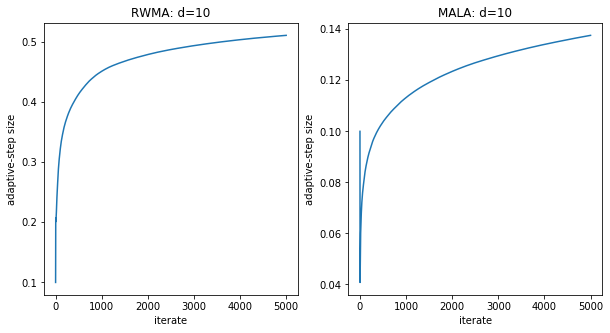

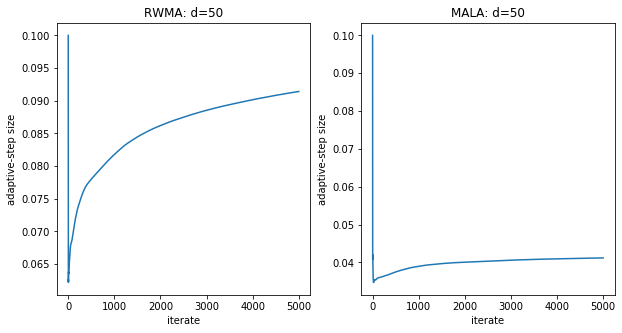

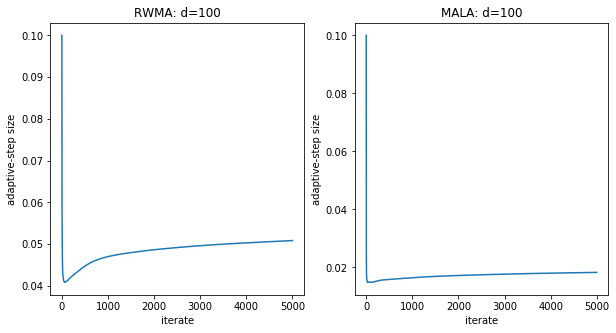

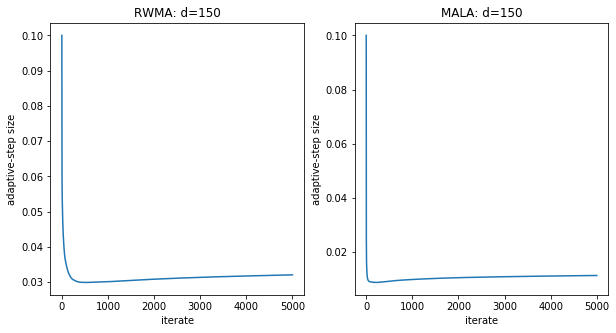

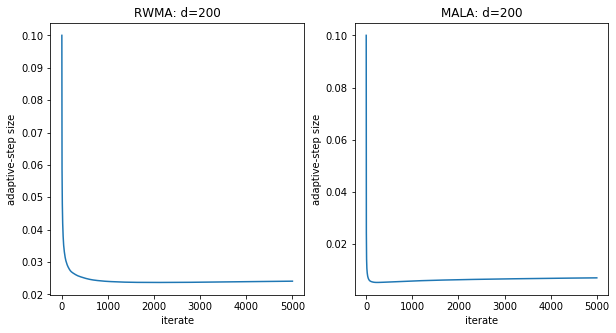

In [86]:
import numpy as np
import matplotlib.pyplot as plt
#1
#set the initial condition X_0 to be 0s
#set the number of samples m to be 10000
#set the initial variance proposal to be 0.1
#d=10
stepRWMA10=opt_RWMA(X_0=np.zeros(10),Dt_0=0.1,d=10,m=5000)['aDt']
stepMALA10=opt_MALA(X_0=np.zeros(10),Dt_0=0.1,d=10,m=5000)['aDt']
aveRWMA10=np.mean(stepRWMA10[4750:5000])
aveMALA10=np.mean(stepMALA10[4750:5000])
fig=plt.figure(figsize=(10,5)) #initialize a Figure
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(range(5001),stepRWMA10)
ax2.plot(range(5001),stepMALA10)
ax1.set(title="RWMA: d=10", xlabel="iterate", ylabel="adaptive-step size")
ax2.set(title="MALA: d=10", xlabel="iterate", ylabel="adaptive-step size")
#d=50
stepRWMA50=opt_RWMA(X_0=np.zeros(50),Dt_0=0.1,d=50,m=5000)['aDt']
stepMALA50=opt_MALA(X_0=np.zeros(50),Dt_0=0.1,d=50,m=5000)['aDt']
aveRWMA50=np.mean(stepRWMA50[4750:5000])
aveMALA50=np.mean(stepMALA50[4750:5000])
fig=plt.figure(figsize=(10,5)) #initialize a Figure
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(range(5001),stepRWMA50)
ax2.plot(range(5001),stepMALA50)
ax1.set(title="RWMA: d=50", xlabel="iterate", ylabel="adaptive-step size")
ax2.set(title="MALA: d=50", xlabel="iterate", ylabel="adaptive-step size")
#d=100
stepRWMA100=opt_RWMA(X_0=np.zeros(100),Dt_0=0.1,d=100,m=5000)['aDt']
stepMALA100=opt_MALA(X_0=np.zeros(100),Dt_0=0.1,d=100,m=5000)['aDt']
aveRWMA100=np.mean(stepRWMA100[4750:5000])
aveMALA100=np.mean(stepMALA100[4750:5000])
fig=plt.figure(figsize=(10,5)) #initialize a Figure
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(range(5001),stepRWMA100)
ax2.plot(range(5001),stepMALA100)
ax1.set(title="RWMA: d=100", xlabel="iterate", ylabel="adaptive-step size")
ax2.set(title="MALA: d=100", xlabel="iterate", ylabel="adaptive-step size")
#d=150
stepRWMA150=opt_RWMA(X_0=np.zeros(150),Dt_0=0.1,d=150,m=5000)['aDt']
stepMALA150=opt_MALA(X_0=np.zeros(150),Dt_0=0.1,d=150,m=5000)['aDt']
aveRWMA150=np.mean(stepRWMA150[4750:5000])
aveMALA150=np.mean(stepMALA150[4750:5000])
fig=plt.figure(figsize=(10,5)) #initialize a Figure
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(range(5001),stepRWMA150)
ax2.plot(range(5001),stepMALA150)
ax1.set(title="RWMA: d=150", xlabel="iterate", ylabel="adaptive-step size")
ax2.set(title="MALA: d=150", xlabel="iterate", ylabel="adaptive-step size")
#d=200
stepRWMA200=opt_RWMA(X_0=np.zeros(200),Dt_0=0.1,d=200,m=5000)['aDt']
stepMALA200=opt_MALA(X_0=np.zeros(200),Dt_0=0.1,d=200,m=5000)['aDt']
aveRWMA200=np.mean(stepRWMA200[4750:5000])
aveMALA200=np.mean(stepMALA200[4750:5000])
fig=plt.figure(figsize=(10,5)) #initialize a Figure
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(range(5001),stepRWMA200)
ax2.plot(range(5001),stepMALA200)
ax1.set(title="RWMA: d=200", xlabel="iterate", ylabel="adaptive-step size")
ax2.set(title="MALA: d=200", xlabel="iterate", ylabel="adaptive-step size")

print('optimal time-step of RWMA when d is 10=',aveRWMA10)
print('optimal time-step of MALA when d is 10=',aveMALA10)
print('optimal time-step of RWMA when d is 50=',aveRWMA50)
print('optimal time-step of MALA when d is 50=',aveMALA50)
print('optimal time-step of RWMA when d is 100=',aveRWMA100)
print('optimal time-step of MALA when d is 100=',aveMALA100)
print('optimal time-step of RWMA when d is 150=',aveRWMA150)
print('optimal time-step of MALA when d is 150=',aveMALA150)
print('optimal time-step of RWMA when d is 200=',aveRWMA200)
print('optimal time-step of MALA when d is 200=',aveMALA200)

$\bullet$For fixed dimension for the two different algorithms, the adaptive-step size in MALA tends to converge to a smaller value than the adaptive-step size in RWMA.

$\bullet$By using the average of last 5\% of $\bigtriangleup t_k$ as a proxy for the optimal-time step of each of the algorithms, the optimal time-step in RWMA depends more on dimension than MALA. IN this sense, MALA behaves better.

# Question 2: Image inpaiting by sparse regularisation 

Image impainting methods seek to recover an uknown image $x \in \mathbb{R}^d$ from a partial and noisy observation $y \in \mathbb{R}^d$ that only contains (corrupted versions of) a subset of the pixels of $x$. We focus on linear inpainting problems of the form $y = \Phi (x + w)$ with $w \sim \mathcal{N}(0,\sigma^2 \mathbb{I}_n)$, and where the so-called masking operator $\Phi \in \mathbb{R}^{n \times n}$ is a diagonal with matrix with diagonal elements $\Phi_{i,i}=1$ when the i-th pixel $x_i$ is observed, and $\Phi_{i,i}=0$ $x_i$ is not observed.

Here we consider image inpainting by sparse regularisation. More precisely, we promote sparsity on a redundant wavelet frame $\Psi \in \mathbb{R}^{d \times p}$ (a wavelet frame is essentially a concatenation of wavelet bases). On this frame, the unknown image is represented by a vector of wavelet coefficients $a \in \mathbb{R}^p$, with $p >> d$. To map $a$ to the pixel domain we apply $x = \Psi a$.

To solve the inpainting problem we use the following estimator that promotes solutions that are sparse on $\Psi$:

$$
a^* = \textrm{argmin}_{a \in \mathbb{R}^p} \quad F_1(a) + F_2(a)\, ,
$$

where 
$$
F_1(a) = \frac{1}{2}\|y - \Phi \Psi a\|_2^2 \quad F_2(a) = \alpha \|a\|_1\, ,
$$

and where $\alpha > 0$ is a regularisation parameter (we use $\alpha = 0.01$). We report the solution on the pixel domain, i.e., $x^* = \Psi a^*$.

Notice that to represent $x$ on the frame we set $a = U \Psi^\star x$, where $\Psi^\star \in \mathbb{R}^{p \times d}$ is the adjoint of $\Psi$, and $U \in \mathbb{R}^{p \times p}$ is a matrix derived from $\Psi$ and $\Psi^\star$ whose role is to take into account the fact that $\Psi$ and $\Psi^\star$ do not form a pair of orthonormal matrices. This is useful, for example, for using $y$ to initialise optimisation algorithms to compute $a^*$ (i.e., we set $a_y = U \Psi^\star y$ as initial condition).


To implement the operators $\Phi$, $\Psi$, $\Psi^\star$, and $U$, we use the nt_toolbox library, available from https://github.com/gpeyre/numerical-tours/raw/master/python/nt_toolbox.zip (to use this library, download the .zip file and extract within your working directory from which you will run the notebook). The operators are defined as follows:

In [88]:
from __future__ import division
import numpy as np
import scipy as scp
import pylab as pyl
import matplotlib.pyplot as plt
from nt_toolbox.general import *
from nt_toolbox.signal import *
from nt_toolbox.perform_wavelet_transf import *
from numpy import random
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2


### Masking operator
# Operator setup
n = 128                                              # dimension (number of image pixels)
rho = .5                                             # proportion of unobserved pixels

Omega = np.zeros([n, n])
sel = random.permutation(n**2)
np.ravel(Omega)[sel[np.arange(int(rho*n**2))]] = 1

# Operator \Phi
Phi = lambda f, Omega: f*(1-Omega)


### Frame operators
# Operator setup
Jmax = np.log2(n)-1
Jmin = (Jmax-3)
J = Jmax-Jmin + 1
u = np.hstack(([4**(-J)], 4**(-np.floor(np.arange(J + 2./3,1,-1./3)))))
Xi = lambda a: perform_wavelet_transf(a, Jmin, -1, ti=1)   

# Operator \Psi, \Psi^\star, and U
U = np.transpose(np.tile(u, (n,n,1)),(2,0,1))                           # Operator U
Psi = lambda a: Xi(a/U)                                                 # Operator \Psi
PsiS = lambda f: perform_wavelet_transf(f, Jmin, + 1, ti=1)             # Operator \Psi^\star


The code below generates the observation $y = \Phi (x + w)$, where $w \sim \mathcal{N}(0,\sigma^2 \mathbb{I}_n)$ with noise standard deviation $\sigma = 0.01$.

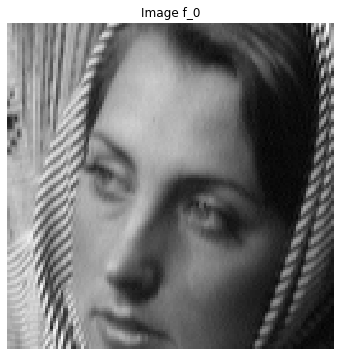

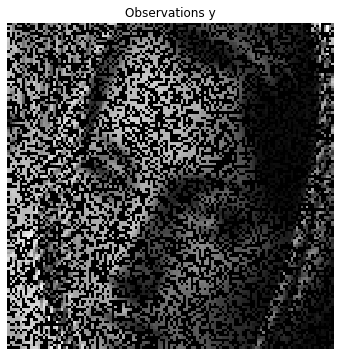

In [90]:
# Load the "barbara" image
f0 = load_image("nt_toolbox/data/barb128.bmp")

# Display original image
plt.figure(figsize = (6,6))
imageplot(f0, 'Image f_0')

# Generate noisy and partial observation 'y'
sigma = 0.01;
y = Phi(f0 + sigma*random.standard_normal(f0.shape), Omega);

# Display observation (unseen pixels are assigned value '0')
plt.figure(figsize = (6,6))
imageplot(y, 'Observations y')

# Compute representation of 'y' on wavelet frame \Psi
ay = U*PsiS(y)

### 2.1
The proximal-gradient algorithm is a standard proximal splitting technique to compute $a^*$ by using the gradient operator $\nabla F_1$ and the proximal operator $prox^\lambda_{F2}$, which are given by

$$
\nabla F_1 (a) = \Psi^\star \Phi (y - \Phi \Psi a) \, ,
$$

and

$$
[prox^\lambda_{F2}(a)]_j = a_j \textrm{max}(0,1-\lambda/|a_j|) \quad \forall j = 1,\ldots,p \, ,
$$

In the code cell below, use the python operators $\Phi$, $\Psi$, and $\Psi^\star$ defined above by using the nt_toolbox library, to construct the operators $\nabla F_1$ and $\textrm{prox}^\lambda_{F_2}$.

In [13]:
alpha=0.01
lambdaa=1/300 #F1 is only local Lipschitz, we need to tune lambdaa 
#(see 2.4 hint, lambdaa needs to be smaller than 1/beta=1/(4^4))
### Gradient operator of F1
# define operator and add code here
Gra_F1 = lambda a,y: -PsiS(Phi(y-Phi(Psi(a),Omega),Omega)) 
### Proximal operator of the l1 norm (the soft thresholding operator)
# define operator and add code here
def prox(a):
    b=1-alpha*lambdaa/a
    b[b<0]=0
    return a*b

### 2.2 
State the expression of the iterates of the *proximal-gradient algorithm* to compute $a^*$.

$\bullet$ Set initial condition to be $a_0=a_y=U\Psi^{\star}y$;

$\bullet$ for iteration $k=1,2,\ldots,$ do

\begin{equation}
    z_k=(I-\lambda\Psi^{\star}\Phi\Phi\Psi) a_{k-1}+\lambda\Psi^{\star}\Phi y
\end{equation}
and
\begin{equation}
    (a_k)_i=\mathrm{sign}((z_k)_i)\max(|(z_k)_i|-\alpha\lambda,0) \qquad \forall i=1,\ldots,p.
\end{equation}

### 2.3

In the code cell below, implement the proximal gradient algorithm to compute $a^*$ in the form of a function that takes as input: an initial condition $a_{0}$, a step size $\delta$, and a number of iterations $T$, while it outputs the final iterate $a_T$ and the sequence of function values $F(a_t) = F_1(a_t) + F_2(a_t)$ for $t = 1,\ldots,T$. 



In [ ]:
# add code here

### 2.4

Use the code above to compute the restored image $x^*$. Display $x^*$ and plot the obtained sequence of function values $F(a_t) = F_1(a_t) + F_2(a_t)$ for $t = 1,\ldots,T$. Briefly discuss your results. 

We recommend using as initial condition $a_y$ and at least $T > 10^4$ iterations. Present any scripts and numerical tests that you run in the code cell below. Any output you use in your discussion should be displayed and easily interpretable.

Hint: To set the step size $\delta$, use the fact the gradient $\nabla F_1$ is $\beta$-Lipschitz continuous with constant $\beta = 4^4$. If the algorithm is correctly implemented and converging, you will observe that $F(a_t)$ decreases monotonically.

In [14]:
# add your code here


*Add your discussion here*